# Sklearn


The purpose of this notebook is to get you familair with the sklearn API for clustering.



** 1. ** Apply each Hierarachical, Kmeans and DBSCAN to the bellow dataset.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_moons, make_circles
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [2]:
X1, y1 = make_blobs(n_samples=1000, centers=5, n_features=2,cluster_std = 0.7 , random_state=0)
X2, y2 = make_moons(n_samples =1000,noise=0.1)
X3, y3 = make_circles(1000,noise=0.01)

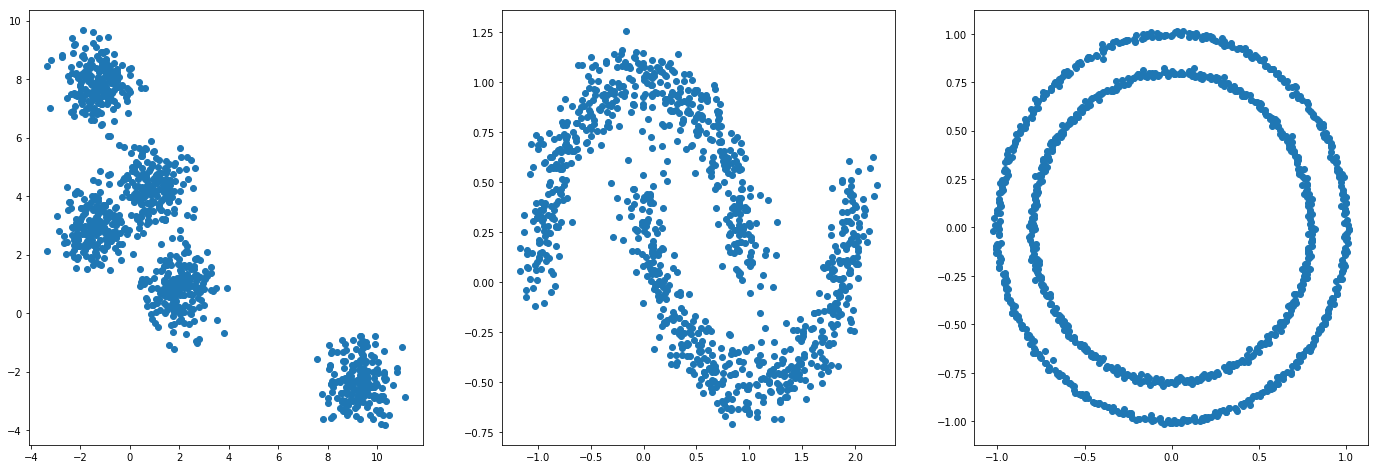

In [3]:
fig, axes = plt.subplots(1,3,figsize=(24,8))

for i,X in enumerate([X1,X2,X3]):
    axes[i].scatter(X[:,0],X[:,1])

#### Using K-Means

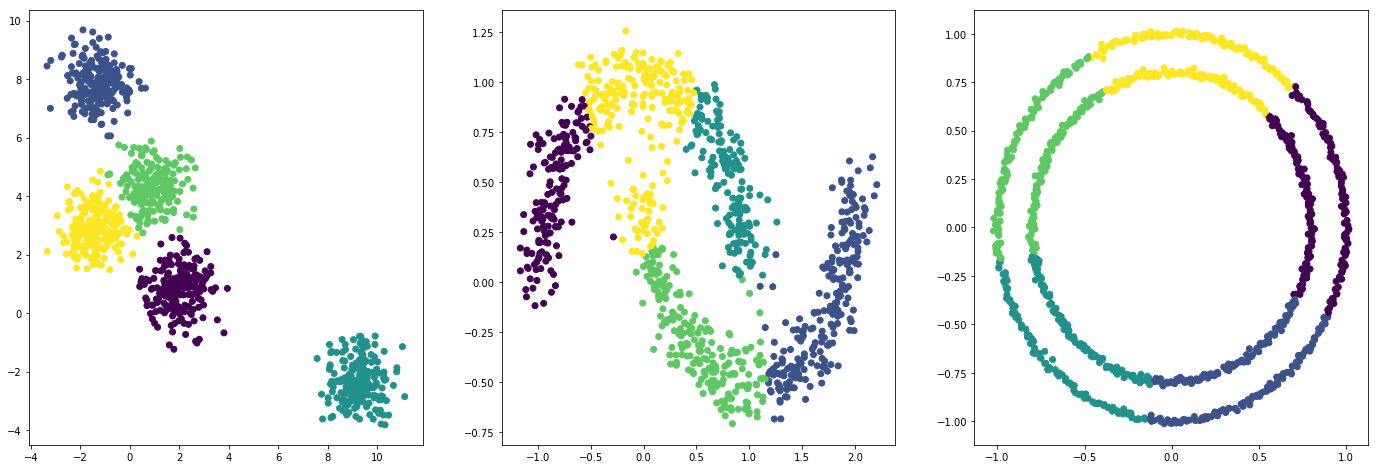

In [4]:
fig, axes = plt.subplots(1,3,figsize=(24,8))

#### kmean - 1
k=5
kmeans_sk = KMeans(k,init='random')
kmeans_sk.fit(X1)
pred_sk = kmeans_sk.predict(X1)
axes[0].scatter(X1[:,0],X1[:,1],c=pred_sk)

#### kmean - 2
kmeans_sk = KMeans(k,init='random')
kmeans_sk.fit(X2)
pred_sk = kmeans_sk.predict(X2)     
axes[1].scatter(X2[:,0],X2[:,1],c=pred_sk)

#### kmean - 3
kmeans_sk = KMeans(k,init='random')
kmeans_sk.fit(X3)
pred_sk = kmeans_sk.predict(X3)
axes[2].scatter(X3[:,0],X3[:,1],c=pred_sk)



#### Using DBscan

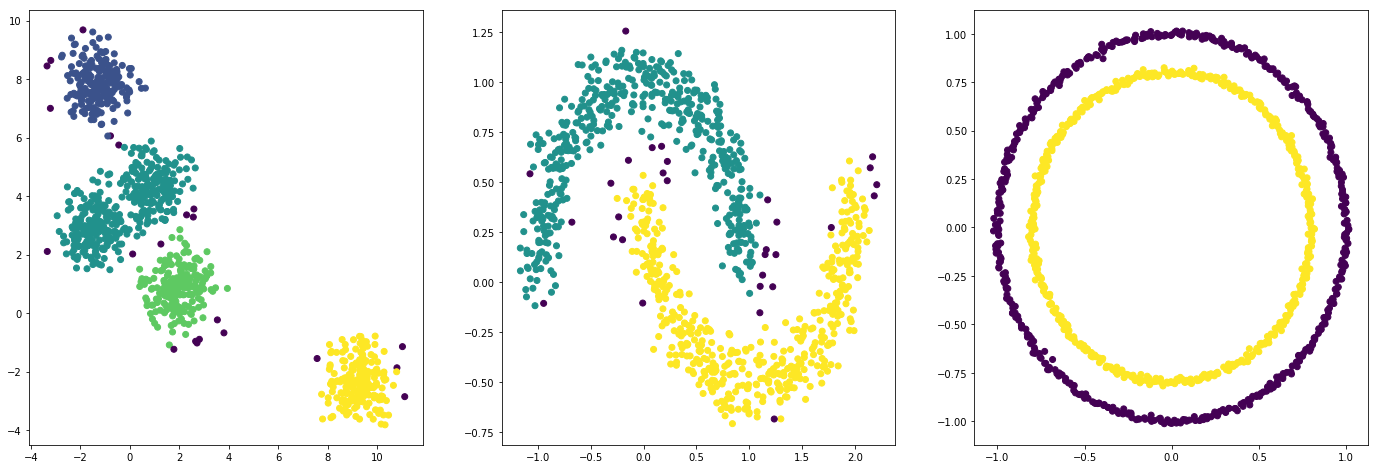

In [5]:
fig, axes = plt.subplots(1,3,figsize=(24,8))

#### dbscan - 1

db = DBSCAN().fit(X1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
axes[0].scatter(X1[:,0],X1[:,1],c=labels)

#### dbscan - 2

db = DBSCAN(eps=0.1).fit(X2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
axes[1].scatter(X2[:,0],X2[:,1],c=labels)

#### dbscan - 3

db = DBSCAN(eps=0.1).fit(X3)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
axes[2].scatter(X3[:,0],X3[:,1],c=labels)


#### Using Agglomerative Clustering

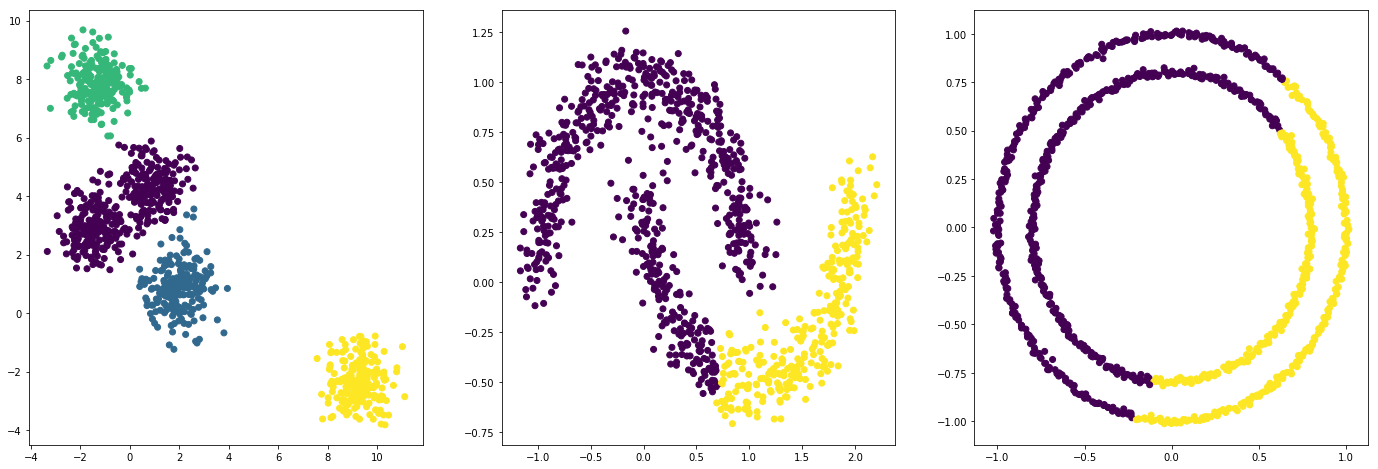

In [29]:
fig, axes = plt.subplots(1,3,figsize=(24,8))

#### AgglomerativeClustering - 1
agg = AgglomerativeClustering(4)
agg.fit(X1)
pred_agg = agg.fit_predict(X1)
axes[0].scatter(X1[:,0],X1[:,1],c=pred_agg)

#### AgglomerativeClustering - 2
kmeans_sk = AgglomerativeClustering(affinity='euclidean',linkage='average')
kmeans_sk.fit(X2)
pred_sk = kmeans_sk.fit_predict(X2)     
axes[1].scatter(X2[:,0],X2[:,1],c=pred_sk)

#### AgglomerativeClustering - 3
kmeans_sk = AgglomerativeClustering()
kmeans_sk.fit(X3)
pred_sk = kmeans_sk.fit_predict(X3)
axes[2].scatter(X3[:,0],X3[:,1],c=pred_sk)

# Colour Compresion


A intresting application of clustering is colour compression. We can use k-means to cluster the pixels by there colour. After clustering we take the centroid, which will be the average of all of the pixels colour in a cluster, and use that as our new colour.

In [7]:
from sklearn.datasets import load_sample_image

In [8]:
import matplotlib.image as mpimg

(-0.5, 639.5, 426.5, -0.5)

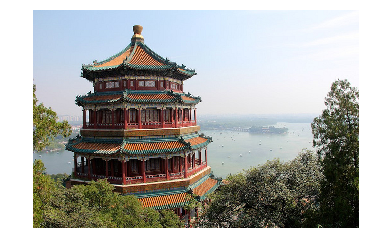

In [9]:
img = load_sample_image('china.jpg')
img = img / 255 # scale values
plt.imshow(img)
plt.axis('off')

** 1. ** Reshape the image to ((height * width ), n_channels).

In [31]:
img.shape

(427, 640, 3)

In [32]:
h, w, c = img.shape
img_r = np.reshape(img, (h* w , c))
img_r.shape

(273280, 3)

In [33]:
img_r

array([[ 0.68235294,  0.78823529,  0.90588235],
       [ 0.68235294,  0.78823529,  0.90588235],
       [ 0.68235294,  0.78823529,  0.90588235],
       ..., 
       [ 0.16862745,  0.19215686,  0.15294118],
       [ 0.05098039,  0.08235294,  0.02352941],
       [ 0.05882353,  0.09411765,  0.02745098]])

** 2. ** Fit kmeans on the model and predict what cluster each pixel is in.

In [34]:
k=3
kmeans_sk = KMeans(k,init='random')
kmeans_sk.fit(img_r)
y_pred = kmeans_sk.predict(img_r)


In [35]:
y_pred

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [36]:
img_r = np.reshape(img_r, (h, w , c))

** 3. ** What is the shape of the clusters cluster centers, and why is it this shape? What do the centroids represent ?

In [38]:
kmeans_sk.cluster_centers_.shape

(3, 3)

In [39]:
img_new = kmeans_sk.cluster_centers_[y_pred]

** 5. ** Reshape the image back to it's original size and plot it.

In [40]:
img_new = np.reshape(img_new, (h, w , c))

(-0.5, 639.5, 426.5, -0.5)

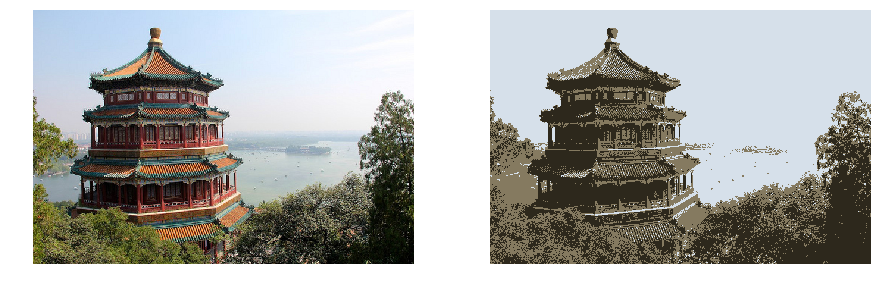

In [41]:
fig, axes = plt.subplots(1,2,figsize=(15,30))
axes[0].imshow(img)
axes[1].imshow(img_new)
axes[0].axis('off')
axes[1].axis('off')